Graph type 0
 0 is Trajectory 
 1 is Velocity 
 2 is Momentum
[  0.           0.         300.         519.61524227] 




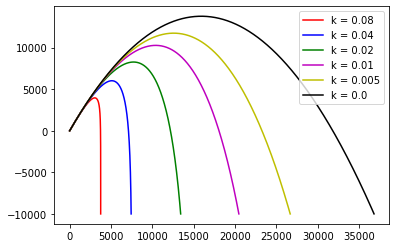

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import sys

#  set 0 or 1 or 2 to case 

case=0

print('Graph type',case)
print(' 0 is Trajectory \n 1 is Velocity \n 2 is Momentum')

#Function
def yprime(state,t,k):  
   g=9.8
   n=len(state)
   yp=np.zeros(n)
   yp[0]=state[2]       # vx, i.e. dx/dt
   yp[1]=state[3]       # vy, i.e. dy/dt
   yp[2]=-k*state[2]    # ax, i.e. dvx/dt
   yp[3]=-g-k*state[3]  # ay, i.e. dvy/dt 
   return yp

def Euler(y0,t,kconstant):
   n=len(t)
   m=len(y0)
   ytemp=np.zeros((n,m),dtype=float)   # n row, m column
   ytemp[0,:]=y0   # copy the initial value to the first row.

   i=0
   while i < (n-2):
      tx=t[i]
      dt=t[i+1]-t[i]
      yp=yprime(ytemp[i,:],tx,kconstant)
      ytemp[i+1,0]=ytemp[i,0]+yp[0]*dt
      ytemp[i+1,1]=ytemp[i,1]+yp[1]*dt
      ytemp[i+1,2]=ytemp[i,2]+yp[2]*dt
      ytemp[i+1,3]=ytemp[i,3]+yp[3]*dt
      i=i+1
      if ytemp[i,1] < -10000.0:
         break
   yval=ytemp[0:i,:]
   return yval


#program strats
dt = 0.01 
tmax = 10000.0
t  = np.arange(0.0,tmax,dt)
c = np.zeros(1000)

v0=600.0
theta=60.0*np.pi/180.0

stateInit=np.zeros(4)
stateInit[0]=0.0    #  x
stateInit[1]=0.0    #  y
stateInit[2]=v0*np.cos(theta)
stateInit[3]=v0*np.sin(theta)
print(stateInit, '\n\n')

kvalArray=np.array([0.08,0.04,0.02,0.01,0.005,0.0])

for k in kvalArray:
   kconstant=k   #(air registance)
   stateA=Euler(stateInit,t,kconstant)
   if k==kvalArray[0]:
     h='r' ##Use color map for graph please!!! or keep doing this, you do you
   if k==kvalArray[1]:
     h='b'
   if k==kvalArray[2]:
     h='g'
   if k==kvalArray[3]:
     h='m'
   if k==kvalArray[4]:
     h='y'
   if k==kvalArray[5]:
     h='k'
   if case==0:
      x=stateA[:,0]
      y=stateA[:,1]
      plt.plot(x,y,h,ls='-',markevery=1000, label= 'k = ' +str(k))
      plt.legend(loc='best')
   if case==1:
      vy=stateA[:,3]
      n=len(vy)
      t2=t[:n]
      plt.plot(t2,vy,h,ls='-',markevery=1000,label= 'k = ' +str(k))
      plt.legend(loc='best')
   if case==2:
      xx=stateA[0::1000,0]
      yy=stateA[0::1000,1]
      vx=stateA[0::1000,2]
      vy=stateA[0::1000,3]
      plt.quiver(xx,yy,vx,vy,label= 'k = ' + str(k),color=h)
      plt.legend(loc='best')
fname="fig_trajectory_case"+str(case)
plt.savefig(fname)
plt.show()
